### pytrends
Pseudo API for Google Trends

refer 
- https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f
- https://towardsdatascience.com/a-very-precise-fast-way-to-pull-google-trends-data-automatically-4c3c431960aa
- https://github.com/GeneralMills/pytrends

In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 33.4 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=7c67e088a48091d041db646f0aed601800c9d96ab8af4525ede6217b91ed6587
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
!pip install pytrends


In [ ]:
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')

In [ ]:
import pandas as pd                        
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
pytrend = TrendReq(hl='ja-jp')

In [ ]:
# max 5 words
keywords = ['圧力鍋' , '電気圧力鍋']

In [ ]:
pytrend.build_payload(kw_list=keywords, timeframe='2018-01-01 2021-09-10')
# Interest by Region
df = pytrend.interest_by_region()

In [ ]:
df[df.index == '日本']

,圧力鍋,電気圧力鍋
geoName,,
日本,83,17


In [ ]:
# 食べログ retty クックパッド クラシル オイシックス
color=['#ff9600', '#ff1014']

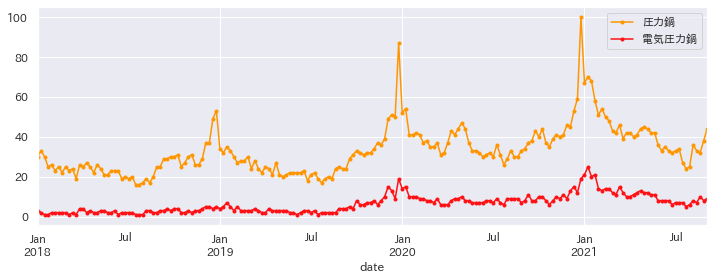

In [ ]:
# weekly
df_interest = pytrend.interest_over_time()
df_interest.plot(figsize=(12, 4), marker='.', color=color)
plt.show()

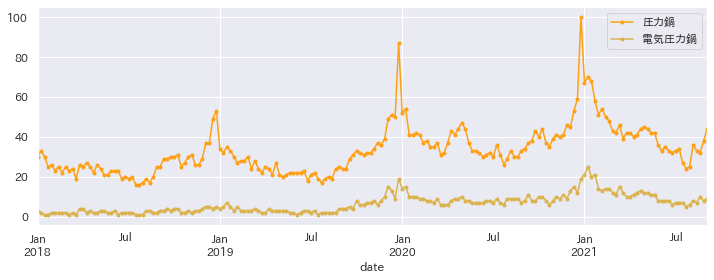

In [ ]:
df_interest[['圧力鍋' , '電気圧力鍋']].plot(figsize=(12, 4), marker='.', color=['#ffa014',  '#dbb34d'])
plt.show()

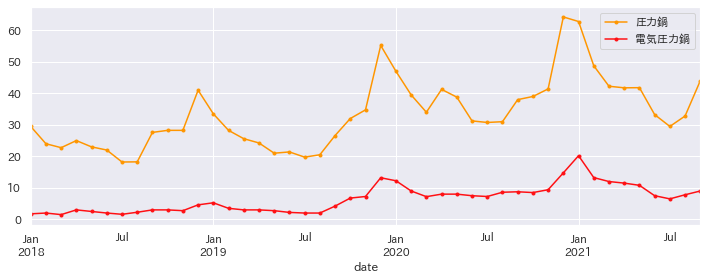

In [ ]:
# monthly mean of each month
df_interest.resample(rule="M").mean().plot(figsize=(12, 4), marker='.', color=color)
plt.show()

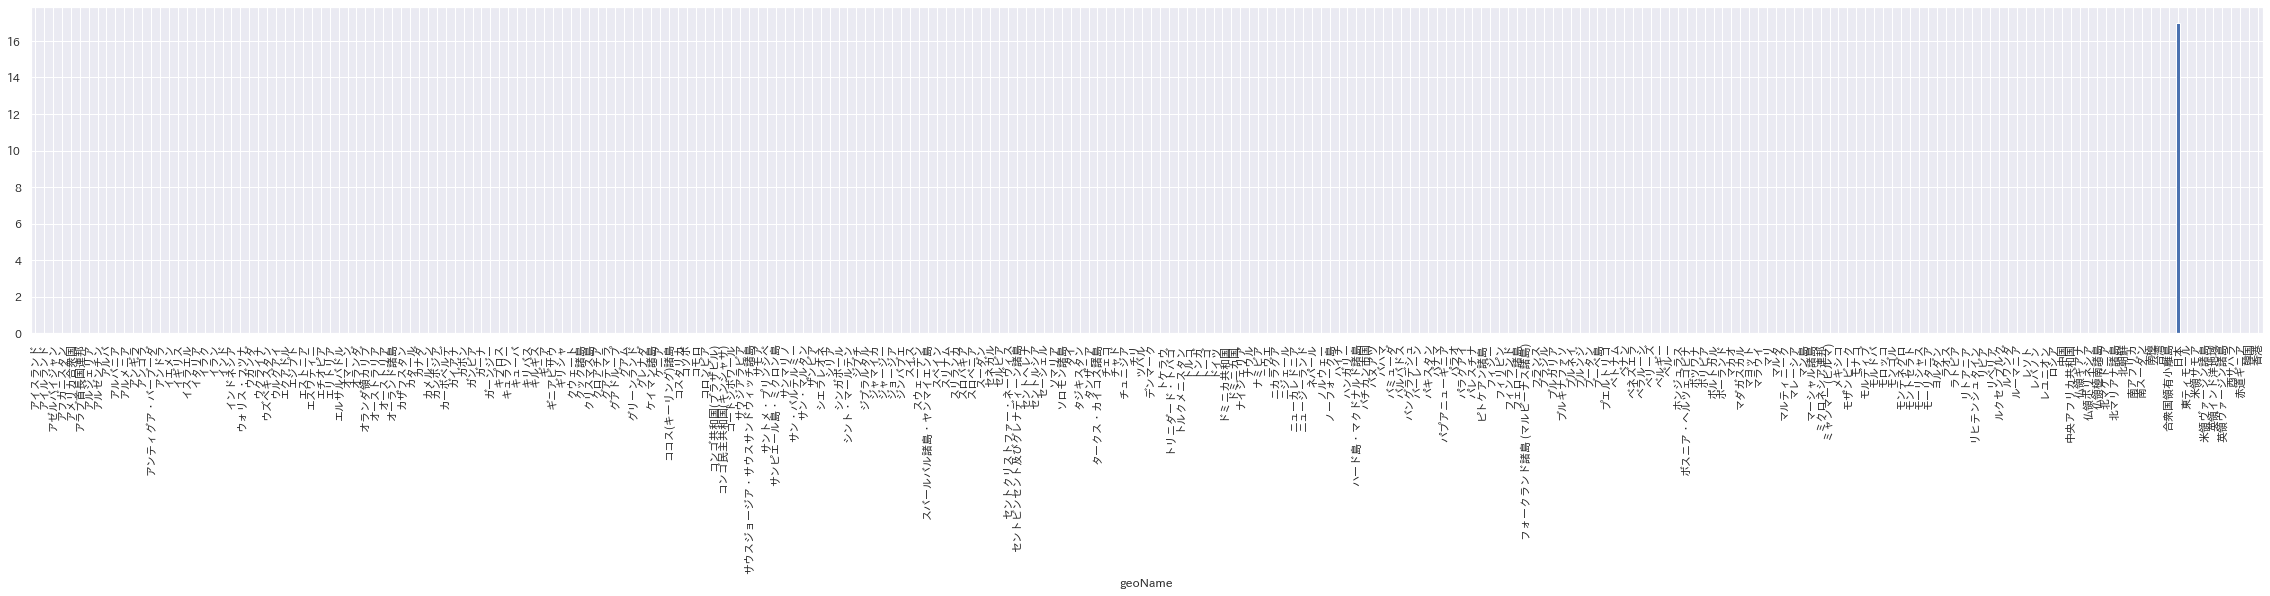

In [ ]:
df['電気圧力鍋'].plot.bar(figsize=(40, 6))
plt.show()

In [ ]:
# related query for each search
rel_dict = pytrend.related_queries()
df_rel = pd.DataFrame()
for keyword in keywords:
    df_t = rel_dict[keyword]['rising']
    df_t['key'] = keyword
    df_rel = pd.concat([df_rel, df_t])
df_rel.head()

,query,value,key
0,クッキング プロ,53050,圧力鍋
1,アイリス オーヤマ 電気 圧力 鍋 レシピ,48400,圧力鍋
2,ショップ ジャパン 電気 圧力 鍋,17550,圧力鍋
3,プレッシャー キング プロ,14450,圧力鍋
4,アイリス 電気 圧力 鍋,12050,圧力鍋


In [ ]:
df_rel[df_rel['key']=='電気圧力鍋']

,query,value,key
0,アイリス 電気 圧力 鍋 レシピ,275300,電気圧力鍋
1,電気 圧力 鍋 アイリス オーヤマ レシピ,255550,電気圧力鍋
2,アイリス オーヤマ 電気 圧力 鍋 レシピ,217450,電気圧力鍋
3,電気 圧力 鍋 クッキング プロ,142600,電気圧力鍋
4,クッキング プロ,128850,電気圧力鍋
5,大根 電気 圧力 鍋,119100,電気圧力鍋
6,アイリス オーヤマ 電気 圧力 鍋 口コミ,76950,電気圧力鍋
7,電気 圧力 鍋 低温 調理,73550,電気圧力鍋
8,ティファール クック フォーミー,61400,電気圧力鍋
9,電気 圧力 鍋 価格 コム,58800,電気圧力鍋


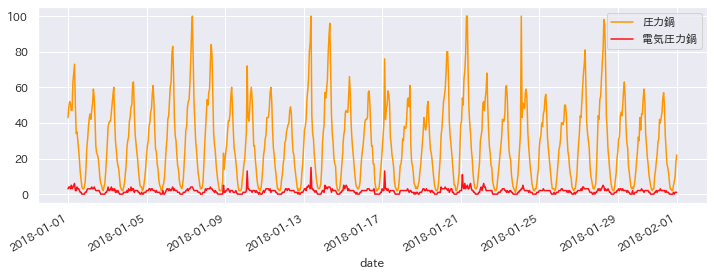

In [ ]:
# 2018 01 houly
df_hist = pytrend.get_historical_interest(keywords, year_start=2018, month_start=1, 
                                          day_start=1, hour_start=0,
                                          year_end=2018, month_end=2,
                                          day_end=1, hour_end=0, cat=0,
                                          geo='', gprop='', sleep=30)
df_hist.plot(figsize=(12, 4), color=color)
plt.show()

In [ ]:
df_hist.head(24)

,圧力鍋,電気圧力鍋,isPartial
date,,,
2018-01-01 00:00:00,43,3,False
2018-01-01 01:00:00,49,4,False
2018-01-01 02:00:00,52,4,False
2018-01-01 03:00:00,51,3,False
2018-01-01 04:00:00,47,5,False
2018-01-01 05:00:00,47,3,False
2018-01-01 06:00:00,63,4,False
2018-01-01 07:00:00,68,5,False
2018-01-01 08:00:00,73,6,False


In [ ]:
# hot trends keyword
#df = pytrend.trending_searches(pn='united_states')
df = pytrend.trending_searches(pn='japan')
df.head()

,0
0,平野レミ
1,乃木坂
2,内田雄馬
3,TPP
4,ポケモンユナイト


In [ ]:
# google top chart
df = pytrend.top_charts(2019, hl='ja-jp', tz=360, geo='JP')
df.head()

,title,exploreQuery
0,台風19号,
1,令和,
2,ラグビーワールドカップ,
3,あなたの番です,あなたの 番 です
4,ドラクエウォーク,ドラクエ ウォーク


In [ ]:
# google keyword suggestions
keywords = pytrend.suggestions(keyword='toyota')
df = pd.DataFrame(keywords)
df

,mid,title,type
0,/g/121259xl,TOYOTA,会社
1,/m/0h5y1j0,トヨタ,自動車のメーカー
2,/m/025rqtz,トヨタ・ヤリス,サブコンパクトカー
3,/m/07mb6,トヨタ自動車,自動車メーカー
4,/m/01wls9,豊田市,日本の都市
